# Cálculo del MGP de la sesión y prueba

Este notebook es un cálculo autocontenido del MGP a partir del IR dada una sesión de juego determinada.

La idea es que es la primera aproximación a un MGP y senta una línea base de la que partir.

En naranja se muestra el IR normalizado, y en azul el MGP.

También se adjunta una función para el cálculo del MGP a partir de una sesión determinada.

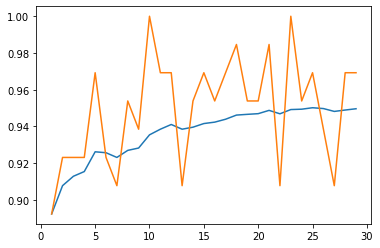

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run ../load-results.ipynb import GetAllResultsFromDifficulties, GetAllResultsFrom
%matplotlib inline

mgpResult = []
mgpSession = []
resultsRaw = GetAllResultsFromDifficulties([0])['Puntaje']
mask = ~resultsRaw.isna()
results = resultsRaw[mask]

patientResults = GetAllResultsFrom(gameSessionIds=[29])['Puntaje']
results = pd.concat([pd.Series([results.min(), results.max()]), patientResults[0:29]])

x = np.linspace(1, results.size-2, results.size-2)

# IR normalizado (MGP resultado)
for i in range(results.size):
    if results[:i+1].min() == results[:i+1].max():
        mgpResult.append(0.5)
    else:
        normalizedResults = (results[:i+1]-results[:i+1].min())/(results[:i+1].max()-results[:i+1].min())
        mgpResult.append(normalizedResults.iloc[i])

mgpResult = mgpResult[2:len(mgpResult)]

# MGP
dfMgpResult = pd.DataFrame(mgpResult)

for i in range(dfMgpResult.size):
    mgpSession.append(dfMgpResult[:i+1].mean())

# Ploteo de datos
plt.plot(x, mgpSession, label='MGP Sesión')
plt.plot(x, mgpResult, label='IR Normalizado')
plt.show()